In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
np.random.seed(19680801)

In [3]:
royal_blue = [0, 20 / 256, 82 / 256]

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

In [4]:
def annotate(ax, x, y, text, code):
    # Circle marker
    c = Circle(
        (x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
        edgecolor=royal_blue + [0.6], facecolor="none",
        path_effects=[withStroke(linewidth=7, foreground="white")]
    )
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground="white")], []]:
        color = "white" if path_effects else royal_blue
        ax.text(
            x, y-0.2, text, zorder=100, path_effects=path_effects,
            ha="center", va="top", weight="bold", color=color,
            style="italic", fontfamily="Courier New",
        )

        color = "white" if path_effects else "black"
        ax.text(
            x, y-0.33, code, zorder=100, path_effects=path_effects,
            ha="center", va="top", weight="normal", color=color,
            fontfamily="monospace", fontsize="medium",
        )

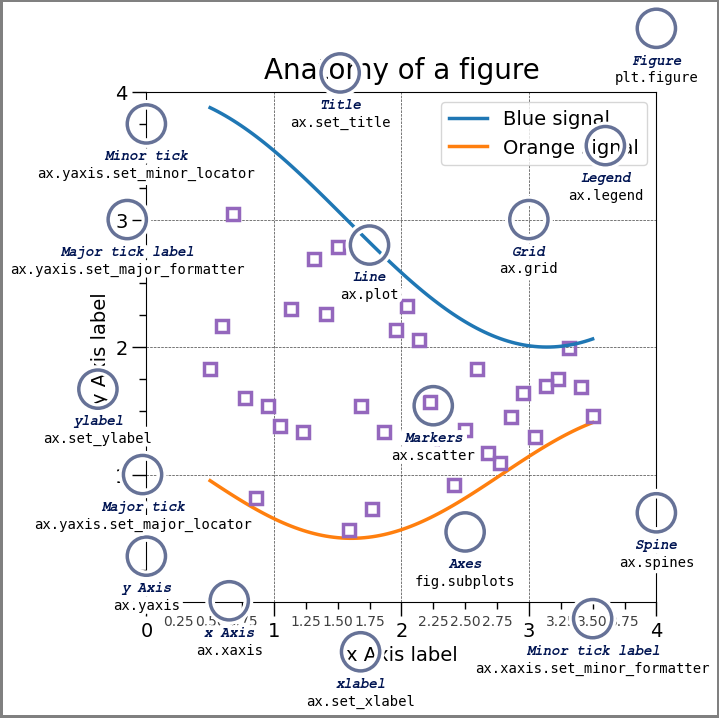

In [5]:
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0, length=10, labelsize=14)
ax.tick_params(which="minor", width=1.0, length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color="0.25", zorder=-10)

ax.plot(X, Y1, c="C0", lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c="C1", lw=2.5, label="Orange signal")
ax.plot(
    X[::3], Y3[::3], linewidth=0, markersize=9, markeredgewidth=2.5,
    marker="s", markerfacecolor="none", markeredgecolor="C4",
)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)

annotate(ax, 3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(ax, -0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(ax, 0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(ax, -0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(ax, 1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(ax, -0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(ax, 1.52, 4.15, "Title", "ax.set_title")
annotate(ax, 1.75, 2.80, "Line", "ax.plot")
annotate(ax, 2.25, 1.54, "Markers", "ax.scatter")
annotate(ax, 3.00, 3.00, "Grid", "ax.grid")
annotate(ax, 3.60, 3.58, "Legend", "ax.legend")
annotate(ax, 2.5, 0.55, "Axes", "fig.subplots")
annotate(ax, 4, 4.5, "Figure", "plt.figure")
annotate(ax, 0.65, 0.01, "x Axis", "ax.xaxis")
annotate(ax, 0, 0.36, "y Axis", "ax.yaxis")
annotate(ax, 4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor="0.5")
plt.show()